# Understanding Black-Scholes Option Pricing:

## 1. Key Financial Concepts First
- Before diving into the Black-Scholes model, let's understand the basic concepts:
- Options Basics
#### An option is a contract giving the right (but not obligation) to buy (call) or sell (put) an asset at a predetermined price (strike price) within a specific time period
**European options** can only be exercised at expiration, while **American options** can be exercised anytime before expiration
The model we're examining focuses on European call options

## 2. The Black-Scholes Formula

The Black-Scholes Formula is a mathematical formula used to calculate the theoretical value of **European options** and is an important concept in modern financial theory. Here is a detailed introduction:

### Formula Forms and Variable Meanings

#### Call Option Formula
$call_price = S\times N(d_1)-K\times e^{-rt}\times N(d_2)$

- $C$ represents the price of the call option.
- $S$ is the current price of the underlying asset, such as the current stock price of a stock.
- $N(d)$ is the cumulative distribution function of the standard normal distribution.
- $K$ is the strike price of the option.
- $r$ is the risk-free interest rate, which is generally approximated by the interest rate of treasury bonds, etc.
- $t$ is the time to expiration of the option (in years).
- $d_1=\frac{\ln(\frac{S}{K})+(r + \frac{\sigma^{2}}{2})t}{\sigma\sqrt{t}}$, $d_2 = d_1-\sigma\sqrt{t}$, where $\sigma$ is the annualized volatility of the return of the underlying asset, which measures the degree of price fluctuation of the underlying asset.

#### Put Option Formula
$put_price = K\times e^{-rt}\times N(-d_2)-S\times N(-d_1)$

The meanings of the variables are consistent with those in the call option formula. In the case of no dividends, according to the put-call parity relationship, the value of the put option can be derived from the value of the call option.

#### Important Assumptions of the Formula

- **Frictionless Market**: There are no transaction costs and taxes, and assets can be infinitely subdivided and freely bought and sold.
- **The Price of the Underlying Asset Follows Geometric Brownian Motion**: This means that price changes are random, and the rate of return follows a normal distribution.
- **Constant Risk-Free Interest Rate**: The risk-free interest rate remains constant during the option's validity period.
- **Constant Volatility of the Underlying Asset**: The volatility of the price of the underlying asset remains stable during the option's validity period.
- **No Arbitrage Opportunities**: The market is in an equilibrium state, and there is no opportunity to obtain excess returns through risk-free arbitrage.
- **European Option**: The option can only be exercised on the expiration date.

## Limitations (thus we need an alternative method--Monte Carlo!!)

- **Assumptions Do Not Match Reality**: In the actual market, there are transaction costs and taxes, and the risk-free interest rate and volatility are not constant. For example, the stock price may fluctuate greatly during some special events, which does not meet the assumption of constant volatility.
- **Poor Pricing Effect for Some Options**: It is mainly applicable to European options and has limitations in pricing American options (which can be exercised at any time before the expiration date); it is also difficult to accurately give the theoretical value for some complex exotic options. 

# Step 1: Implementation of Black-Scholes Analytical Solution

In [ ]:
# def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate Black-Scholes price for a European call option
    
    Parameters:
    S: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate (annual)
    sigma: Volatility of the underlying asset
    
    Returns:
    call_price: Option price according to Black-Scholes model
    """
    # Import necessary functions
    from scipy.stats import norm
    import numpy as np
    
    # Calculate d1 and d2
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate call price
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return call_price

## **1. Importing Necessary Functions**

In [ ]:
# Import necessary functions
from scipy.stats import norm
import numpy as np

**Why these libraries?**
- `numpy` provides efficient mathematical computation capabilities
- `scipy.stats` contains the norm function needed to calculate the cumulative distribution function (CDF) of the normal distribution, which is central to the Black-Scholes formula

## **2. Calculating d1 and d2**
Recall that $d_1=\frac{\ln(\frac{S}{K})+(r + \frac{\sigma^{2}}{2})t}{\sigma\sqrt{t}}$, $d_2 = d_1-\sigma\sqrt{t}$

In [ ]:
# Calculate d1 and d2
d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

**Why calculate these?**
These are key variables in the Black-Scholes formula, where:
- `d1` represents the probability of the underlying asset price exceeding the strike price in the risk-neutral measure
- `d2` represents the probability of the option expiring in-the-money in the actual measure

**Why calculate `d1` first, then `d2`?**
Computing `d2` reuses the value of `d1`, which is more efficient and reduces the chance of errors

## **3. Computing the Final Option Price**
Recall that $call_price = S\times N(d_1)-K\times e^{-rt}\times N(d_2)$

In [ ]:
# Calculate call price
call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

**Why use this formula?**
This is the core equation of the Black-Scholes model, where:

- The first term `S * norm.cdf(d1)` represents the present value of receiving the stock if the option expires in-the-money
- The second term `K * np.exp(-r * T) * norm.cdf(d2)` represents the present value of paying the strike price on exercise
- `norm.cdf()` calculates the cumulative distribution function of the normal distribution, representing the probability of the corresponding scenario

## **4. Returning the Result**

In [ ]:
return call_price

**Why simple return?**
The sole purpose of the function is to calculate the option price, so directly returning this value is most logical and concise

# Step 2: Implement Monte Carlo Simulation for Option Pricing 

### WHY MONTE CARLO？？？

## Understanding Monte Carlo Simulation
**What is Monte Carlo?**
Monte Carlo is a numerical method that uses random sampling to solve problems. In option pricing, we want to find the fair price of an option. For a European call option, we use it to estimate the expected pay - off of the option at maturity and then discount it to the present value.

**Why do we use it?**
1. Complexity of real - world scenarios
The Black - Scholes model has strict assumptions (e.g., constant volatility). In real markets, these assumptions don't always hold. Monte Carlo can handle more complex situations.
2. Pricing complex options
Black - Scholes can only price European options analytically. For American options or exotic options, Monte Carlo can be used.

**Formula and how it works**

#### Step 1: Simulate the underlying asset price at maturity

We assume the underlying asset price at maturity follows geometric Brownian motion. The formula to simulate it is:

$$S_T = S_0\exp\left((r - \frac{1}{2}\sigma^{2})T + \sigma\sqrt{T}Z\right)$$

Where:
- $S_0$ is the current asset price
- $r$ is the risk-free rate
- $\sigma$ is the volatility
- $T$ is the time to maturity
- $Z$ is a random number from a standard normal distribution ($Z \sim N(0, 1)$)

#### Step 2: Calculate the option pay-off at maturity

For a European call option, the pay-off at maturity is given by:

$$C_T = \max(S_T - K, 0)$$

Where $K$ is the strike price. If the asset price at maturity $S_T$ is higher than the strike price $K$, the option has a positive pay-off; otherwise, it's 0.

#### Step 3: Calculate the option price

We repeat the above two steps $N$ times (a large number). Then, we calculate the average of all the pay-offs and discount it back to the present value. The formula for the option price is:

$$C_0 = e^{-rT}\frac{1}{N}\sum_{i = 1}^{N}C_{T,i}$$

As $N$ gets larger, the result converges to the true option price according to the law of large numbers.

In [1]:
def monte_carlo_call(S, K, T, r, sigma, num_simulations=100000):
    """
    Price a European call option using Monte Carlo simulation
    
    Parameters:
    S: Current stock price
    K: Strike price
    T: Time to maturity (in years)
    r: Risk-free interest rate (annual)
    sigma: Volatility of the underlying asset
    num_simulations: Number of price path simulations
    
    Returns:
    call_price: Option price according to Monte Carlo simulation
    """
    import numpy as np
    
    # Generate random stock price paths
    Z = np.random.standard_normal(num_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    # Calculate payoffs at maturity
    #payoffs = C_T
    payoffs = np.maximum(ST - K, 0)
    
    # Discount payoffs to present value
    #call_price = C_0
    call_price = np.exp(-r * T) * np.mean(payoffs)
    
    return call_price

**1. Import Numpy**

In [ ]:
import numpy as np

In [ ]:
We need it for generating random numbers and performing fast calculations on arrays

**2. Generate Random Stock Price Paths**

In [ ]:
Z = np.random.standard_normal(num_simulations)

- This creates an array of `num_simulations` random numbers (e.g., 100,000)
- Each number is drawn from a standard normal distribution (mean 0, standard deviation 1)
- Each random number represents one possible "future scenario"

**3. Calculate Stock Prices at Maturity**

In [ ]:
ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

- This implements the formula for geometric Brownian motion
- `ST` represents the stock price at time T (maturity) for each scenario
- The formula has two parts:
    - Deterministic part: `(r - 0.5 * sigma**2) * T`
    - Random part: `sigma * sqrt(T) * Z`
- We end up with 100,000 different possible future stock prices

**4. Calculate Option Payoffs**

In [ ]:
payoffs = np.maximum(ST - K, 0)

- For each scenario, we calculate what the option would pay at maturity
- For a call option, the payoff is: max(stock price - strike price, 0)
- If the stock price is below the strike price, the option is worthless (payoff = 0)
- If the stock price is above the strike price, the payoff is the difference

**5. Calculate Present Value**

In [ ]:
call_price = np.exp(-r * T) * np.mean(payoffs)

- First, we calculate the average (mean) payoff across all scenarios
- Then, we discount this average back to today's value using `e^(-rT)`
- This is necessary because the payoffs occur in the future, and money today is worth more than money in the future

**6. Return the Result**

In [ ]:
return call_price #returns the estimated option price based on our Monte Carlo simulation

# Step 3: Implement a function to Compare Convergence
In order to verify the accuracy of the Monte Carlo simulation, we need to implement a `visualize_convergence` function

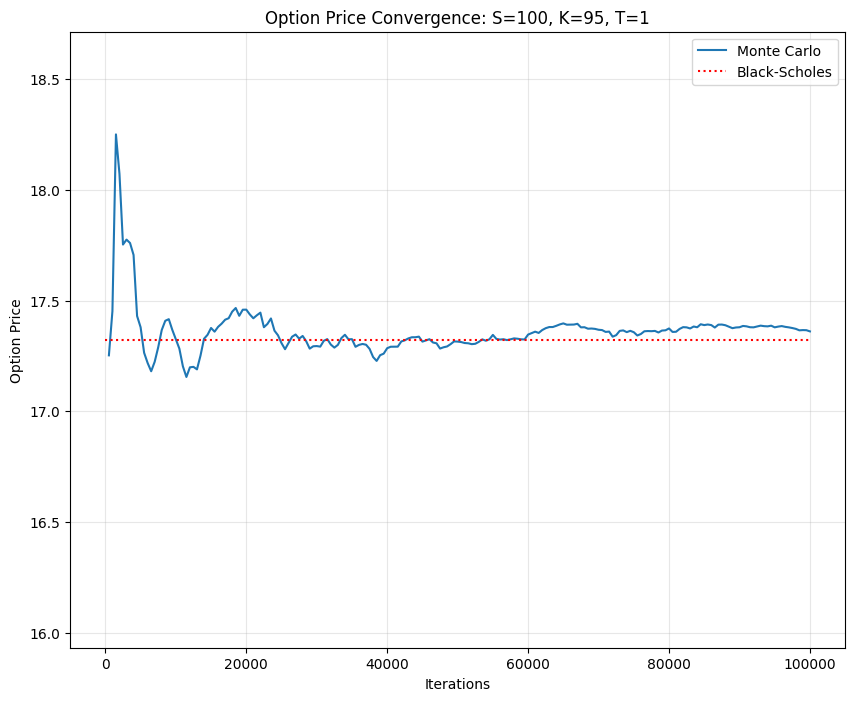

Final Monte Carlo price after 100000 iterations: 17.361214
Black-Scholes price: 17.323563
Absolute difference: 0.037651
Relative error: 0.217338%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Black-Scholes Exact formula
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Monte Carlo simulation with tracking convergence
def monte_carlo_call_tracking(S, K, r, sigma, T, num_simulations=100000, step=500):
    # Pre-allocate a list to store results (more efficient than appending to DataFrame)
    iterations = list(range(step, num_simulations + 1, step))
    prices = []
    
    # Generate all random numbers at once
    np.random.seed(42)
    Z = np.random.standard_normal(num_simulations)
    
    # Calculate all stock prices at maturity
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    # Calculate all payoffs
    payoffs = np.maximum(ST - K, 0)
    
    # Calculate running average at specified steps
    for i in range(step, num_simulations + 1, step):
        # Take the first i payoffs
        current_payoffs = payoffs[:i]
        
        # Calculate current price estimate
        current_price = np.exp(-r * T) * np.mean(current_payoffs)
        
        # Add to list
        prices.append(current_price)
    
    # Create DataFrame after collecting all data
    df = pd.DataFrame({'Iter': iterations, 'Price': prices})
    return df

# Visualization function
def visualize_convergence_tracking(S, K, r, sigma, T, num_simulations=100000, step=500):
    # Calculate exact Black-Scholes price
    bs_price = black_scholes_call(S, K, T, r, sigma)
    
    # Get Monte Carlo prices at different iteration counts
    df = monte_carlo_call_tracking(S, K, r, sigma, T, num_simulations, step)
    
    # Plot the convergence
    plt.figure(figsize=(10, 8))
    plt.plot(df['Iter'], df['Price'], lw=1.5, label='Monte Carlo')
    plt.hlines(bs_price, xmin=0, xmax=num_simulations, 
               linestyle='dotted', colors='red', label='Black-Scholes')
    
    plt.title(f'Option Price Convergence: S={S}, K={K}, T={T}')
    plt.xlabel('Iterations')
    plt.ylabel('Option Price')
    
    # Set y-axis limits to show detail around the exact price
    delta = max(0.5, abs(bs_price - df['Price'].min()) * 1.5, abs(df['Price'].max() - bs_price) * 1.5)
    plt.ylim(bs_price - delta, bs_price + delta)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return df

# Example parameters
S = 100      # Current stock price
K = 95       # Strike price
T = 1        # Time to maturity in years
r = 0.06     # Risk-free rate (6%)
sigma = 0.3  # Volatility (30%)

# Visualize convergence
result_df = visualize_convergence_tracking(S, K, r, sigma, T, 100000, 500)

# Print final results
final_mc_price = result_df['Price'].iloc[-1]
bs_price = black_scholes_call(S, K, T, r, sigma)
print(f"Final Monte Carlo price after {result_df['Iter'].iloc[-1]} iterations: {final_mc_price:.6f}")
print(f"Black-Scholes price: {bs_price:.6f}")
print(f"Absolute difference: {abs(final_mc_price - bs_price):.6f}")
print(f"Relative error: {abs(final_mc_price - bs_price)/bs_price*100:.6f}%")

### What's the Conclusion?

This graph shows the **convergence** of option pricing between Monte Carlo simulation and the Black-Scholes model for a call option with parameters S=100 (stock price), K=95 (strike price), and T=1 (time to expiration in years).

Now, here’s what’s really interesting about the graph. When you first start running the Monte Carlo simulation, the results are all over the place, like a wild rollercoaster ride (that’s the blue line). But as you keep cranking up the number of iterations, it slowly starts to settle down and get closer and closer to the price calculated by the Black-Scholes model, which is marked by that red dotted line. It’s like watching a storm calm down and the clouds finally clear!

After running a hundred thousand iterations, the Monte Carlo method spit out a price of 17.361214. On the other hand, the Black-Scholes formula gave us 17.323563. The difference between the two? Just 0.037651. That’s only about a 0.217338% relative error. Not too shabby, right?

At the beginning, those random fluctuations in the Monte Carlo method are pretty obvious. But as you add more and more iterations, they start to fade away. That’s a perfect example of the law of large numbers doing its thing. The more trials you run, the closer you get to the true value.

So, what does all this mean? Well, it proves that if you’re willing to run enough iterations, the Monte Carlo simulation can get pretty darn close to the Black-Scholes model. But here’s the catch: at the start, it takes a ton of computing power to get that accuracy. 
Meanwhile, the Black-Scholes model gives you an answer right off the bat with its neat analytical solution. As long as its assumptions hold up in the real world, it’s way more efficient. BUT! It is not always the case:(

**1. Import Section**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

This imports `NumPy` for numerical operations, `Matplotlib` for plotting, and `norm` (the normal distribution function) from SciPy's statistics module.

**2. Monte Carlo Tracking Function**

In [ ]:
def monte_carlo_call_tracking(S, K, r, sigma, T, num_simulations=100000, step=500):
    # Pre-allocate a list to store results
    iterations = list(range(step, num_simulations + 1, step))
    prices = []
    
    # Generate all random numbers at once
    np.random.seed(42)
    Z = np.random.standard_normal(num_simulations)

Here I'm:
- Creating empty lists to track our progress
- Setting a random seed (42) for reproducibility - this ensures we get the same "random" numbers each time we run the code
- Generating all random numbers at once, which is more efficient than generating them inside a loop

In [ ]:
def visualize_convergence(S, K, T, r, sigma, max_simulations=1000000):
    # Black-Scholes analytical price
    bs_price = black_scholes_call(S, K, T, r, sigma)
    
    # Different simulation sizes
    sim_sizes = [1000, 5000, 10000, 50000, 100000]
    mc_prices = []
    relative_errors = []
    
    for n in sim_sizes:
        mc_price = monte_carlo_call(S, K, T, r, sigma, n)
        mc_prices.append(mc_price)
        relative_errors.append(abs(mc_price - bs_price) / bs_price * 100)

In [ ]:
#Creating a figure with two subplots:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First subplot
plt.subplot(1, 2, 2)  # Second subplot

#Using logarithmic scales:
plt.semilogx()  # Logarithmic X-axis
plt.loglog()    # Logarithmic X and Y axes
#Log scales allow visualization of data spanning multiple orders of magnitude
#Particularly useful for convergence studies as errors typically decrease logarithmically

#Plot markers and styles
plt.semilogx(sim_sizes, mc_prices, 'bo-', label='Monte Carlo')
#'bo-' means blue('b') circles('o') with connecting lines('-')
#The second plot uses 'go-' for green points and lines

#create a horizontal Black-Scholes reference line:
plt.axhline(y=bs_price, color='r', linestyle='--', label='Black-Scholes')

#Ensures proper spacing between subplots
plt.tight_layout()

**3. Tracking the Convergence**

In [ ]:
# Calculate running average at specified steps
    for i in range(step, num_simulations + 1, step):
        # Take the first i payoffs
        current_payoffs = payoffs[:i]
        
        # Calculate current price estimate
        current_price = np.exp(-r * T) * np.mean(current_payoffs)
        
        # Add to list
        prices.append(current_price)

This is the key improvement part:

- Instead of just calculating the final result, we track how the estimate evolves
- Every 500 simulations (or whatever step size you choose), we calculate the average price so far
- This shows us how the Monte Carlo estimate converges as we add more simulations

**4. Visualization Function**

In [ ]:
def visualize_convergence_tracking(S, K, r, sigma, T, num_simulations=100000, step=500):
    # Calculate exact Black-Scholes price
    bs_price = black_scholes_call(S, K, T, r, sigma)
    
    # Get Monte Carlo prices at different iteration counts
    df = monte_carlo_call_tracking(S, K, r, sigma, T, num_simulations, step)

## **Using real-life data to compare the results**

Analyzing SPY options expiring on 2025-05-23
Current stock price: $545.52
Time to expiration: 0.079 years (29 days)

Summary Statistics:
Average BS Error: 12.41%
Average MC Error: 11.78%


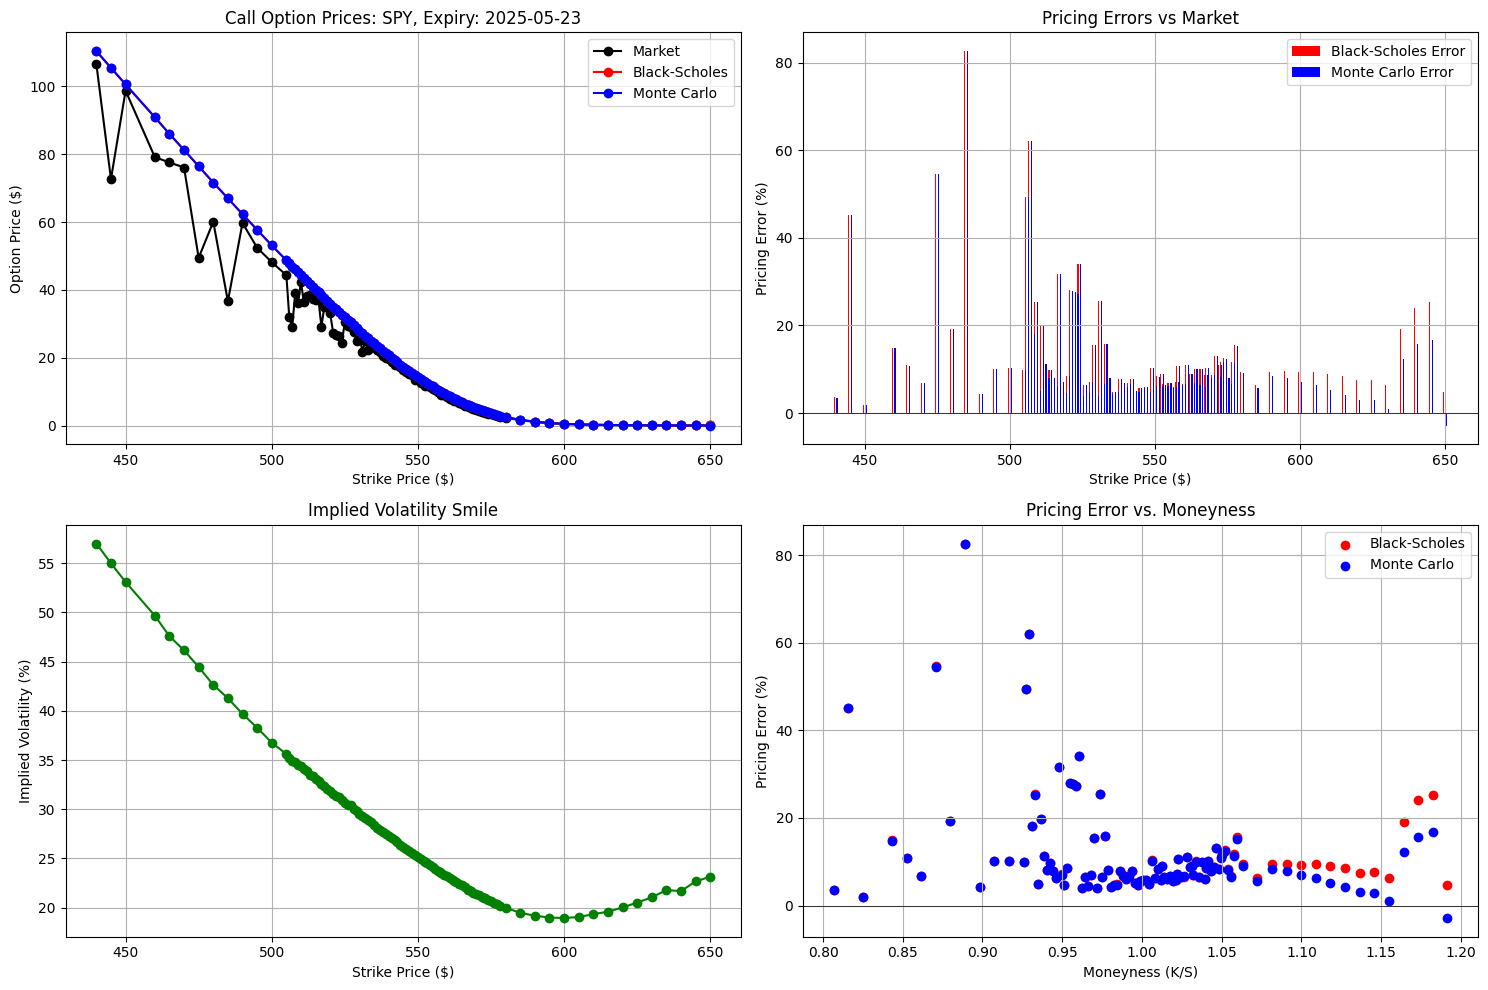

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import datetime as dt

# Black-Scholes function
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Monte Carlo function
def monte_carlo_call(S, K, T, r, sigma, num_simulations=100000):
    np.random.seed(42)  # For reproducibility
    Z = np.random.standard_normal(num_simulations)
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoffs)
    return call_price

# Function to get real market data
def get_option_data(ticker='SPY', days_to_expiry=30):
    # Download stock data
    stock = yf.Ticker(ticker)
    current_price = stock.history(period='1d')['Close'].iloc[-1]
    
    # Get available expiration dates
    expirations = stock.options
    
    # Find the expiration closest to the requested days
    today = dt.datetime.now().date()
    target_date = today + dt.timedelta(days=days_to_expiry)
    
    closest_expiry = min(expirations, key=lambda x: 
                         abs((dt.datetime.strptime(x, '%Y-%m-%d').date() - target_date).days))
    
    # Get options chain
    options = stock.option_chain(closest_expiry)
    calls = options.calls
    
    # Calculate actual time to expiration in years
    expiry_date = dt.datetime.strptime(closest_expiry, '%Y-%m-%d').date()
    T = (expiry_date - today).days / 365.0
    
    # Get risk-free rate (approximate with 3-month Treasury yield)
    # In a production environment, get this from a reliable source
    risk_free_rate = 0.05  # Example value
    
    print(f"Analyzing {ticker} options expiring on {closest_expiry}")
    print(f"Current stock price: ${current_price:.2f}")
    print(f"Time to expiration: {T:.3f} years ({(expiry_date - today).days} days)")
    
    return current_price, calls, T, risk_free_rate, closest_expiry

# Main function to compare pricing models with market data
def compare_option_pricing_models(ticker='SPY', days_to_expiry=30):
    # Get market data
    S, calls, T, r, expiry_date = get_option_data(ticker, days_to_expiry)
    
    # Filter calls to analyze
    # Consider options that are not too far from the money
    calls = calls[(calls['strike'] >= 0.8*S) & (calls['strike'] <= 1.2*S)]
    
    # Prepare data for comparison
    results = []
    
    for _, option in calls.iterrows():
        K = option['strike']
        market_price = option['lastPrice']
        implied_vol = option['impliedVolatility']
        
        # Skip if data is missing or unusual
        if np.isnan(market_price) or np.isnan(implied_vol) or implied_vol > 1.0:
            continue
            
        # Calculate model prices
        bs_price = black_scholes_call(S, K, T, r, implied_vol)
        mc_price = monte_carlo_call(S, K, T, r, implied_vol, 50000)
        
        # Calculate percentage errors
        bs_error = (bs_price - market_price) / market_price * 100
        mc_error = (mc_price - market_price) / market_price * 100
        
        # Store results
        results.append({
            'Strike': K,
            'Market': market_price,
            'Black-Scholes': bs_price,
            'Monte Carlo': mc_price,
            'BS Error %': bs_error,
            'MC Error %': mc_error,
            'Implied Vol': implied_vol
        })
    
    # Convert to DataFrame for easier analysis
    results_df = pd.DataFrame(results)
    
    # Display summary
    print("\nSummary Statistics:")
    print(f"Average BS Error: {results_df['BS Error %'].mean():.2f}%")
    print(f"Average MC Error: {results_df['MC Error %'].mean():.2f}%")
    
    # Create visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Option Prices Comparison
    plt.subplot(2, 2, 1)
    plt.plot(results_df['Strike'], results_df['Market'], 'ko-', label='Market')
    plt.plot(results_df['Strike'], results_df['Black-Scholes'], 'ro-', label='Black-Scholes')
    plt.plot(results_df['Strike'], results_df['Monte Carlo'], 'bo-', label='Monte Carlo')
    plt.xlabel('Strike Price ($)')
    plt.ylabel('Option Price ($)')
    plt.title(f'Call Option Prices: {ticker}, Expiry: {expiry_date}')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Pricing Errors
    plt.subplot(2, 2, 2)
    plt.bar(results_df['Strike'] - 0.5, results_df['BS Error %'], width=0.4, color='r', label='Black-Scholes Error')
    plt.bar(results_df['Strike'] + 0.5, results_df['MC Error %'], width=0.4, color='b', label='Monte Carlo Error')
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.xlabel('Strike Price ($)')
    plt.ylabel('Pricing Error (%)')
    plt.title('Pricing Errors vs Market')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Implied Volatility Smile
    plt.subplot(2, 2, 3)
    plt.plot(results_df['Strike'], results_df['Implied Vol'] * 100, 'go-')
    plt.xlabel('Strike Price ($)')
    plt.ylabel('Implied Volatility (%)')
    plt.title('Implied Volatility Smile')
    plt.grid(True)
    
    # Plot 4: Error vs. Moneyness
    plt.subplot(2, 2, 4)
    moneyness = results_df['Strike'] / S
    plt.scatter(moneyness, results_df['BS Error %'], color='r', label='Black-Scholes')
    plt.scatter(moneyness, results_df['MC Error %'], color='b', label='Monte Carlo')
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.xlabel('Moneyness (K/S)')
    plt.ylabel('Pricing Error (%)')
    plt.title('Pricing Error vs. Moneyness')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return results_df

# Run the analysis on SPY (S&P 500 ETF)
results = compare_option_pricing_models('SPY', 30)

Analyzing AAPL options expiring on 2025-06-20
Current stock price: $207.52
Time to expiration: 0.156 years (57 days)

Summary Statistics:
Average BS Error: 7.32%
Average MC Error: 7.15%


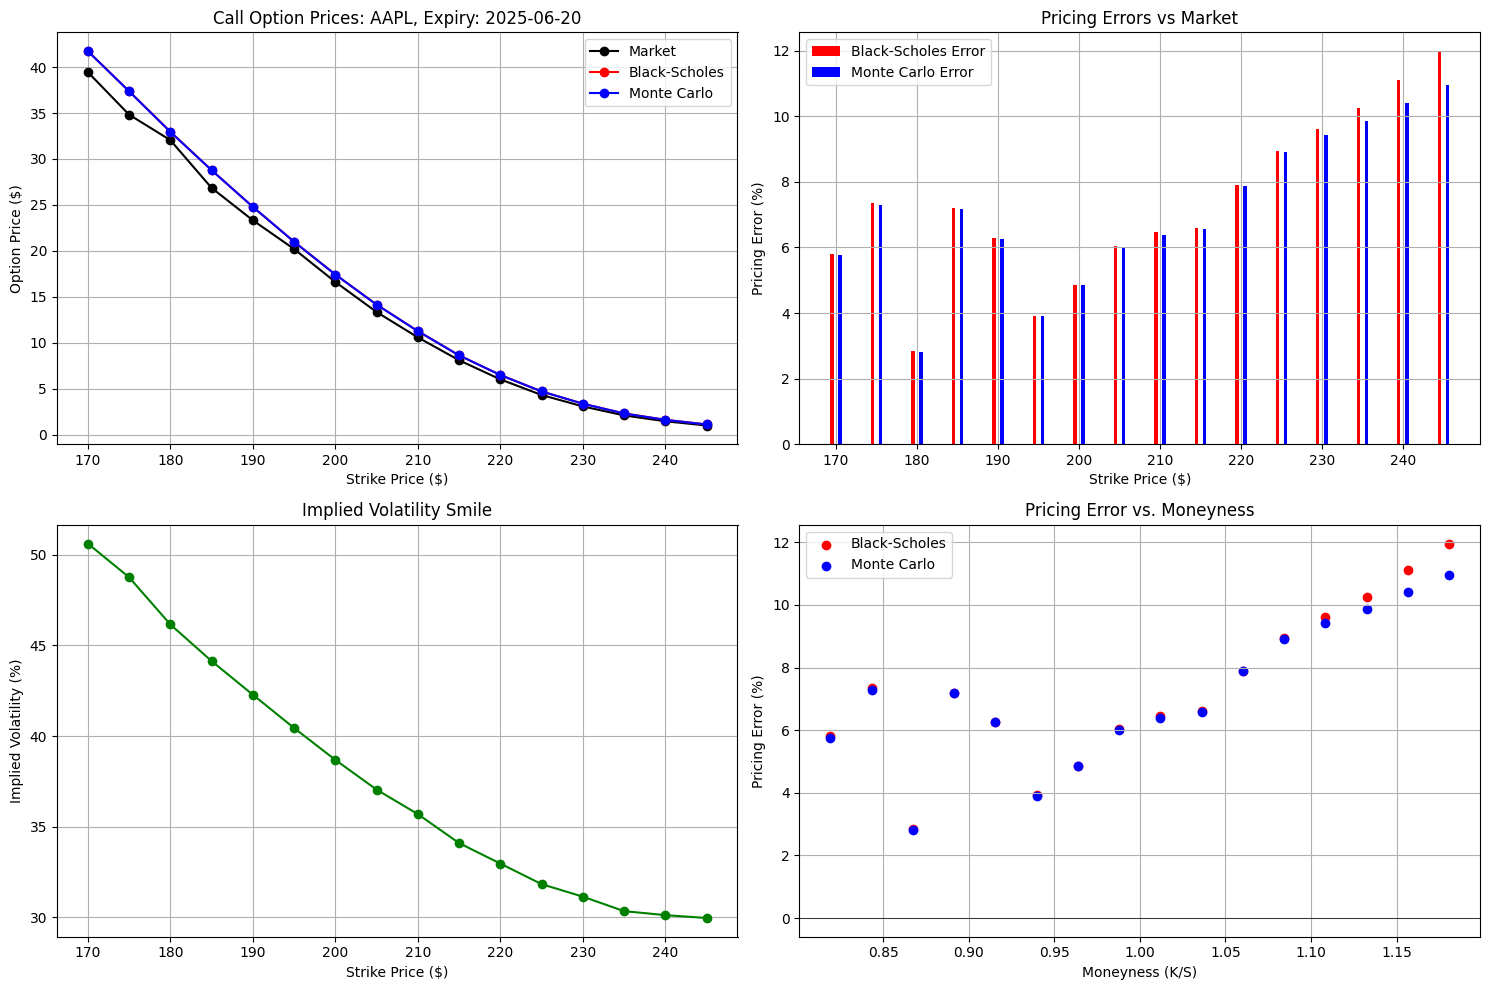

In [9]:
apple_results = compare_option_pricing_models('AAPL', 60)

After analyzing the options data of AAPL and SPY, we've come to several significant conclusions. Let's break them down to see what they really mean!

### 1. Accuracy of Pricing Models
- **AAPL Options**: For AAPL options with 57 days left until expiration, both pricing models perform pretty similarly. But the Monte Carlo model edges out slightly in terms of accuracy. It has an average error of 7.15%, while the Black-Scholes model shows 7.32%. It's a small difference, but in trading, those tiny margins can add up and impact your profits.
- **SPY Options**: When it comes to SPY options with just 29 days to expiration, the Monte Carlo model again outperforms a bit. Its average error is 11.78%, compared to the Black-Scholes model's 12.41%. Think of it like two chefs cooking the same dish – one just gets the seasoning a bit more precise.

### 2. The Volatility Smile
- **Common Feature**: Both AAPL and SPY options exhibit a noticeable "volatility smile." What does this mean? It means that options that are in - the - money (where the strike price is lower than the current price of the underlying asset) and out - of - the - money (where the strike price is higher) have higher implied volatility. It's as if the market is subtly signaling that these extreme situations carry more risk than they might seem at first glance.
- **AAPL's Curve**: AAPL's volatility curve is relatively smooth. As the strike prices increase, the volatility gradually drops from around 50% to 30%. It's like the temperature steadily decreasing as you climb up a mountain.
- **SPY's Curve**: SPY, on the other hand, shows a more pronounced smile. When the strike prices go above 600, the volatility shoots back up, like a rollercoaster taking an unexpected sharp turn.

### 3. Pricing Error vs. Moneyness
- **General Pattern**: For both AAPL and SPY options, the further an option gets from being at - the - money (where the strike price is close to the current price of the underlying asset, i.e., K/S ≈ 1.0), the larger the pricing error becomes. It's similar to using a navigation system – the closer you are to your destination, the more accurate the directions; the farther away, the more room there is for deviation.
- **Extreme Cases**: For extremely out - of - the - money options (with high moneyness values), the pricing errors skyrocket. It's like trying to find a small island in the vast ocean – the uncertainty becomes much greater.
- **Model Comparison**: Across most moneyness levels, the Black-Scholes model generally shows slightly higher errors than the Monte Carlo model. This suggests that the Monte Carlo model might be more reliable when dealing with different scenarios.

### 4. Market Price Discrepancies
- **SPY**: SPY's market prices are extremely volatile and deviate significantly from the model prices, especially when the strike prices are between 450 and 500. It's as if the market is dancing to its own wild rhythm, ignoring the beat set by the models.
- **AAPL**: In contrast, AAPL's market prices align much more closely with both models across all strike prices. It's like a reliable friend – consistent and reassuring.

### 5. Impact of Time to Expiration
- **Difference between the Two**: SPY options with only 29 days to expiration have a significantly higher average error, exceeding 11%. In comparison, AAPL options with 57 days left until expiration have an average error of around 7%. It's like cramming for an exam – the less time you have, the more rushed your preparation is, and the higher the chance of making mistakes.
- **General Trend**: This indicates that as the expiration date approaches, the accuracy of both pricing models declines. It's similar to how even the most well - laid plans can start to fall apart as a deadline looms.

In a nutshell, both pricing models can give us a decent estimate of option prices. But when it comes to deep in - the - money and out - of - the - money options, or as options near their expiration, they start to struggle, and the errors pile up. In these real - world market examples, the Monte Carlo model consistently performs a bit better than the Black-Scholes model. Now we have a much clearer picture when analyzing options! 